<a href="https://colab.research.google.com/github/jeraldflowers/Neurals-Network-Build/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import layers, models, optimizers

## Data Download

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
train_labels.shape

(404,)

In [5]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [6]:
train_labels[0]

15.2

## Normalization

In [7]:
mean = train_data.mean(axis=0)
train_data = train_data - mean
std = train_data.std(axis=0)
train_data = train_data / std

test_data = test_data - mean
test_data = test_data / std

## Defining the Network

In [19]:
def build_model_regression(lr_var, input_data):
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(input_data,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer = optimizers.RMSprop(lr=lr_var), loss='mse', metrics =['mae'])
  return model

## K-fold Validation

In [30]:
k = 4
num_val_samples = len(train_data) // k
num_epoch = 85
all_history = []

In [31]:
num_val_samples

101

In [32]:
for i in range(k):
  print("Fold:", i)
  val_data = train_data[i*num_val_samples : (i+1) * num_val_samples]
  val_targets = train_labels[i*num_val_samples : (i+1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]
       ],
       axis=0)
  
  partial_train_targets = np.concatenate(
      [train_labels[:i * num_val_samples],
       train_labels[(i+1) * num_val_samples:]
       ],
       axis=0)
  
  model = build_model_regression(0.001, 13)
  history = model.fit(partial_train_data, partial_train_targets,
                      epochs=num_epoch,
                      batch_size=16,
                      validation_data=(val_data, val_targets),
                      verbose=0
                      )
  all_history.append(history.history['val_mae'])

Fold: 0


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Fold: 1
Fold: 2
Fold: 3


## MAE Average

In [33]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

all_mae_avg

0     19.590429
1     16.320827
2     12.162589
3      8.100953
4      5.885799
        ...    
80     2.322900
81     2.352424
82     2.298615
83     2.288711
84     2.357154
Length: 85, dtype: float64

## Results Display

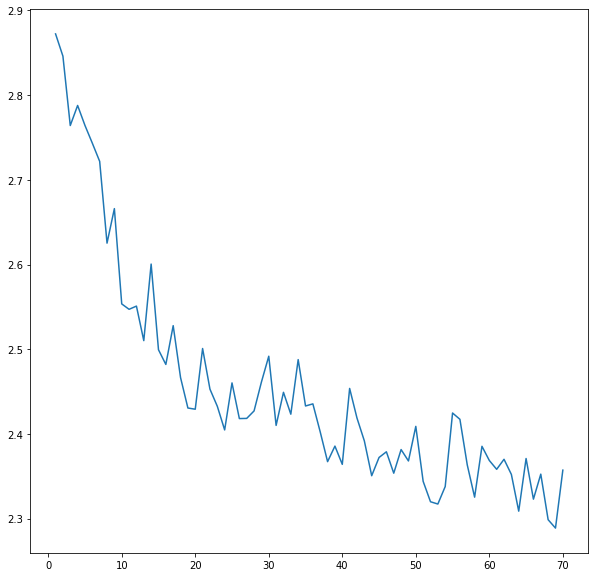

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(range(1, len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

## Evaluating the Model

In [36]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 21.8907 - mae: 2.7425


[21.890663146972656, 2.7424893379211426]